Importing  the basic Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



Load Dataset from Local Directory 

In [1]:
from google.colab import files
uploaded = files.upload()
 

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset.shape)
print(dataset.head(5))


(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


Upper Confidence Bound 

In [11]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0]*no_of_Ads
sums_of_rewards_of_each_ads = [0]*no_of_Ads
total_reward = 0
for n in range(0,observations):
     ad = 0
     max_upper_bound = 0 
     for i in range(0, no_of_Ads):
       if (numbers_of_selections_of_each_ads[i] > 0):
         average_reward = sums_of_rewards_of_each_ads[i]/numbers_of_selections_of_each_ads
         delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections_of_each_ads[i])
         upper_bound = average_reward + delta_i
       else:
           upper_bound = 1e400
       if (upper_bound > max_upper_bound).any():
         max_upper_bound = upper_bound
         ad = i
     ads_selected.append(ad)
     numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
     reward = dataset.values[n,ad]
     sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] +reward
     total_reward = total_reward + reward
     
print("Rewards by Ads = ", sums_of_rewards_of_each_ads)     
print("Total rewards by UCB = ", total_reward)     
print("Ads selected at each round = ", ads_selected)






AttributeError: ignored

Visualizing Result

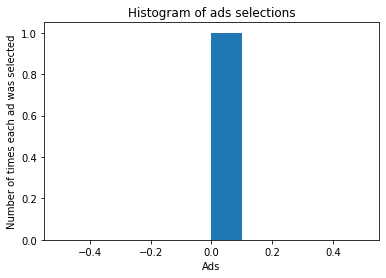

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
